#Self Organizing Map

##Install MiniSom Package

In [3]:
!pip install MiniSom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for MiniSom: filename=MiniSom-2.3.5-py3-none-any.whl size=12042 sha256=e6b89a511f8d13987a148a0fab22178fca94d9fc215ec8c1c7956aaae5f22e0f
  Stored in directory: c:\users\sanjiv\appdata\local\pip\cache\wheels\0f\8c\a4\5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built MiniSom


### Importing the libraries


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [7]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [11]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


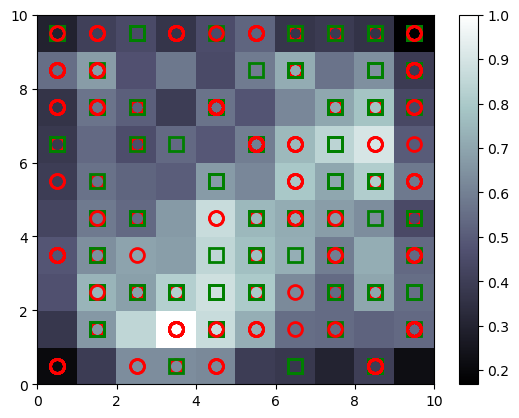

In [13]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [15]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)], mappings[(4,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [17]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15687688
15638610
15649160
15621244
15632789
15567834
15591035
15694677
15772941
15608804
15587297
15609823
15594133
15721507
15625501
15569595
15598574
15587443
